In [4]:
from autolens.autofit import non_linear
from autolens.autofit import model_mapper
from autolens.pipeline import phase as ph
from autolens.lensing import galaxy_model as gm
from autolens.imaging import image as im
from autolens.imaging import mask
from autolens.profiles import light_profiles as lp
from autolens.profiles import mass_profiles as mp
from autolens.plotting import imaging_plotters
from autolens.plotting import fitting_plotters

# In this example, we're going to take an image and find a lens model that provides a good fit to it and we're going 
# to do this without any knowledge of what the 'correct' lens model is. 

# So, what do I mean by a 'lens model'? The lens model is the combination of light profiles and mass profiles we use to 
# represent lens galaxy, source galaxy and therefore create a tracer. Thus, to begin, we have to choose the 
# parametrization of our lens model. We don't need to specify the values of its light and mass profiles (e.g. the
# centre, einstein_radius, etc.) - only the profiles are. In this example, we'll use the following lens model:

# 1) A spherical Isothermal Sphere (SIS) for the lens galaxy's mass.
# 2) A spherical exponential light profile for the source galaxy's light.

# I'll let you into a secret - this is the same lens model that I used to simulate the image we'll fit (but I'm not
# going to tell you the actual parameters I used!).

# So, how do we infer these parameters? Well, we could randomly guess a lens model, corresponding to some
# random set of parameters. We could use this lens model to create a tracer and fit the image-data, and quantify how
# good the fit was using its likelihood (we inspected this in previous tutorial). If we kept guessing lens
# models, eventually we'd find one that provides a good fit (i.e. high likelihood) to the data!

# It may sound nuts, but this is actually the basis of how lens modeling works. However, we do a lot better than
# random guessing. Instead, we track the likelihood of our previous guesses, and guess more models using combinations
# of parameters that gave higher likelihood solutions previously. The idea is that if a set of parameters provided a 
# good fit to the data, another set with similar values probably will too.

# This is called 'non-linear search' and its a fairly common analysis found in science. Over the next few tutorials, 
# we're going to really get our heads around the concept of a non-linear search - this intuition will prove crucial 
# in being a successful lens modeler.

# We're going to use a non-linear search called 'MultiNest'. I highly recommend it, and find its great for lens 
# modeling. However, for now, lets not worry about the details of how MultiNest actually works. Instead, just
# picture that a non-linear search in PyAutoLens operates as follows:

# 1) Randomly guess a lens model and use its light-profiles and mass-profiles to set up a lens galaxy, source galaxy 
#    and a tracer.

# 2) Pass this tracer through the fitting module, generating a model image and comparing this model image to the
#    observed strong lens imaging data. This means that we've computed a likelihood.

# 3) Repeat this many times, using the likelihoods of previous fits (typically those with a high likelihood) to
#    guide us to the lens models with the highest liikelihood.

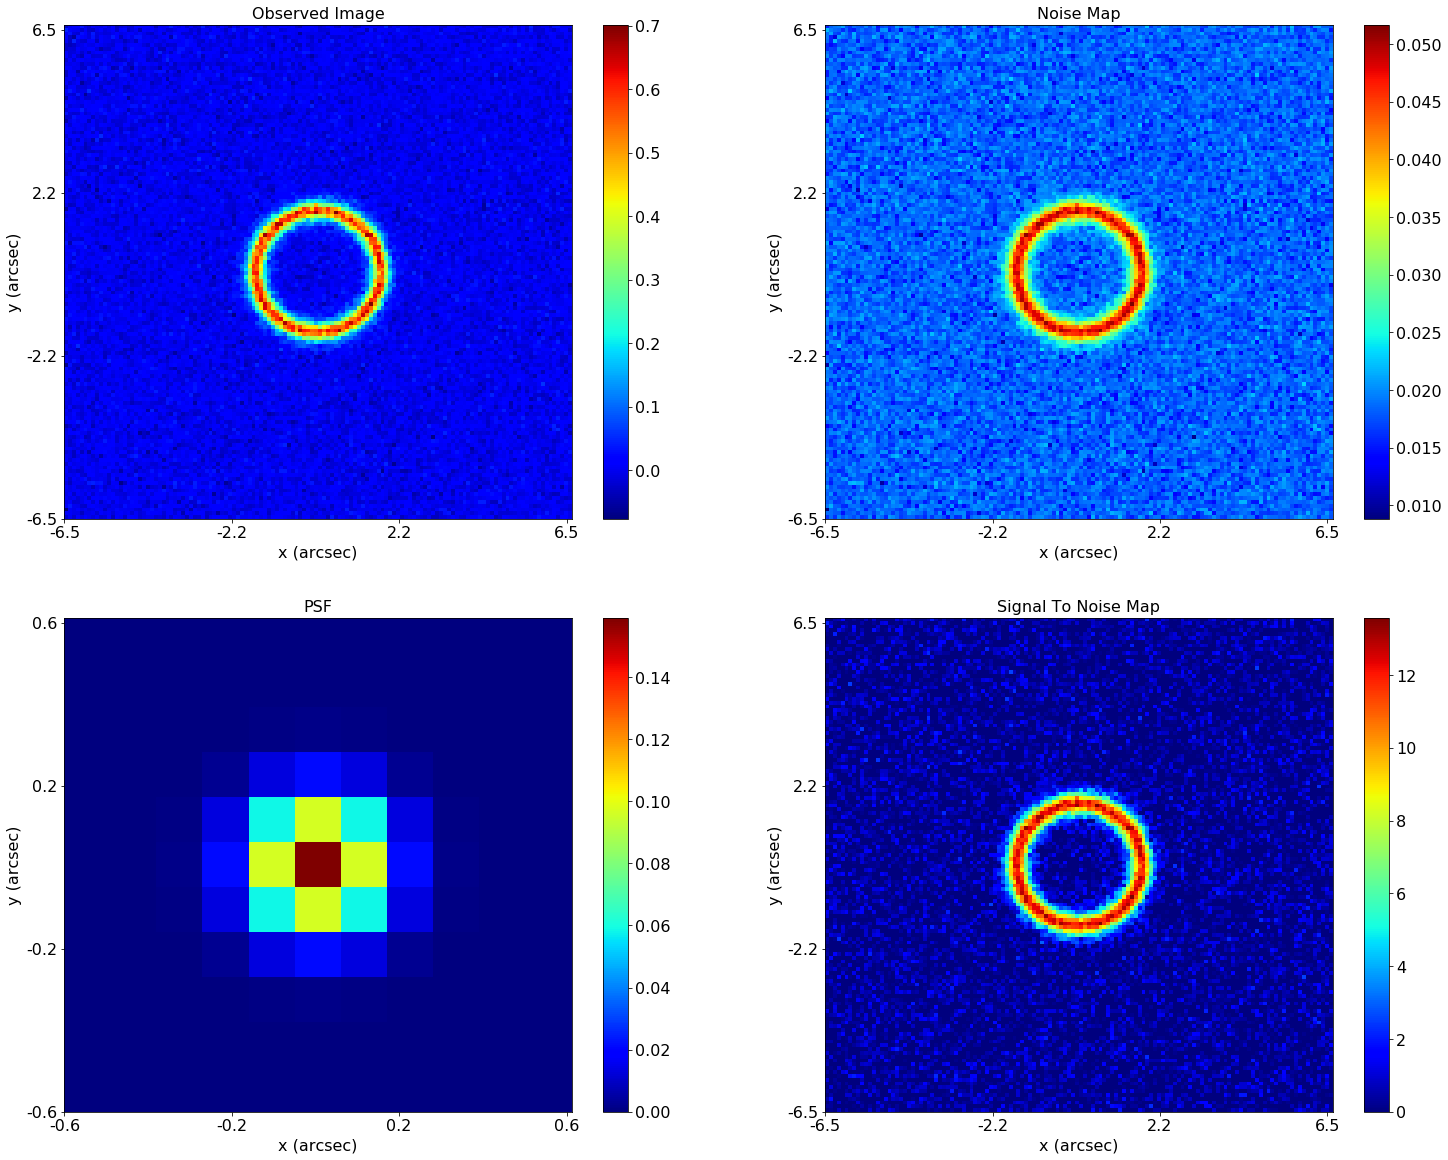

In [5]:
# So, lets get on with it! In the file 'simulations', we've simulated the image we'll fit in this example.
# Don't look at this file yet - lets keep the lens model's input parameters unknown.

path = 'path/to/AutoLens/howtolens/1_modeling'
path = '/home/jammy/PyCharm/Projects/AutoLens/howtolens/2_lens_modeling'
image = im.load_imaging_from_path(image_path=path + '/data/1_non_linear_search_image.fits',
                                  noise_map_path=path+'/data/1_non_linear_search_noise_map.fits',
                                  psf_path=path + '/data/1_non_linear_search_psf.fits', pixel_scale=0.1)
imaging_plotters.plot_image(image=image)

In [6]:
# A GalaxyModel behaves analogously to the Galaxy objects we're now used to. However, whereas for a Galaxy we
# manually specified the value of every parameter of its light-profiles and mass-profiles, for a GalaxyModel
# these are inferred by the non-linear search.

# Lets model the lens galaxy with an SIS mass profile (which is what it was simulated with).
lens_galaxy_model = gm.GalaxyModel(mass=mp.SphericalIsothermal)

In [8]:
# Lets model the source galaxy with a spherical exponential light profile (again, what it was simulated with).
source_galaxy_model = gm.GalaxyModel(light=lp.SphericalExponential)

In [9]:
# A phase takes our galaxy models and fits their parameters via a non-linear search (in this case, MultiNest). In this
# example, we have a lens-plane and source-plane, so we use a LensSourcePlanePhase.
phase = ph.LensSourcePlanePhase(lens_galaxies=[lens_galaxy_model], source_galaxies=[source_galaxy_model],
                                optimizer_class=non_linear.MultiNest, 
                                phase_name='howtolens/2_lens_modeling/1_non_linear_search')

In [10]:
# To run the phase, we simply pass it the image data we want to fit, and the non-linear search begins! As the phase
# runs, a logger will show you the parameters of the best-fit model.
results = phase.run(image)

DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Mass Profiles:
SphericalIsothermal
centre: (0.6396498317460714, -0.4305008654986439)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.3571663637180398
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
SphericalExponential
centre: (-0.019888727002797955, -0.42399467974578375)
axis_ratio: 1.0
phi: 0.0
intensity: 0.03981554846310817
effective_radius: 0.9738735816449917
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Mass Profiles:
SphericalIsothermal
centre: (0.016063978758274394, -0.11326764096735108)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.5709637547766993
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
SphericalExponential
centre: (0.05085885163219128, 0.0368594334902355)
axis_ratio: 1.0
phi: 0.0
intensity: 0.2147562371494474
effective_radius: 0.15852896015374557
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Mass Profiles:
SphericalIsothermal
centre: (-0.07393691767350816, -0.040832205985835285)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.578216779710738
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
SphericalExponential
centre: (-0.029199921119711585, -0.01326972976069819)
axis_ratio: 1.0
phi: 0.0
intensity: 0.2307656998620909
effective_radius: 0.16141474584527082
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Mass Profiles:
SphericalIsothermal
centre: (0.03691139086850185, 0.005640520560916001)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.596641982320915
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
SphericalExponential
centre: (-0.006762741039293782, 0.013429829203038222)
axis_ratio: 1.0
phi: 0.0
intensity: 0.2152406419299101
effective_radius: 0.1925367128508957
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Mass Profiles:
SphericalIsothermal
centre: (0.010522178377261942, -0.005508877324693371)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.5985955125869586
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
SphericalExponential
centre: (0.0010188924271564608, 0.001365372154053667)
axis_ratio: 1.0
phi: 0.0
intensity: 0.20815793186571857
effective_radius: 0.19105027446727213
sersic_index: 1.0]




/home/jammy/PyCharm/Projects/AutoLens/autolens/../output/howtolens/2_lens_modeling/1_non_linear_search/optimizer/multinest.txt
Removed no burn in


In [ ]:

# Whilst it is running (which should only take a few minutes), you should checkout the 'AutoLens/output/howtolens'
# folder. This is where the results of the phase are written to your hard-disk (in the '1_non_linear_search'
# folder). When its completed, images and output will also appear in this folder, meaning that you don't need to keep 
# running python code to see the results.

# We can print the results to see the best-fit model parameters
print(results) # NOTE - this isn't working yet, need to sort out.

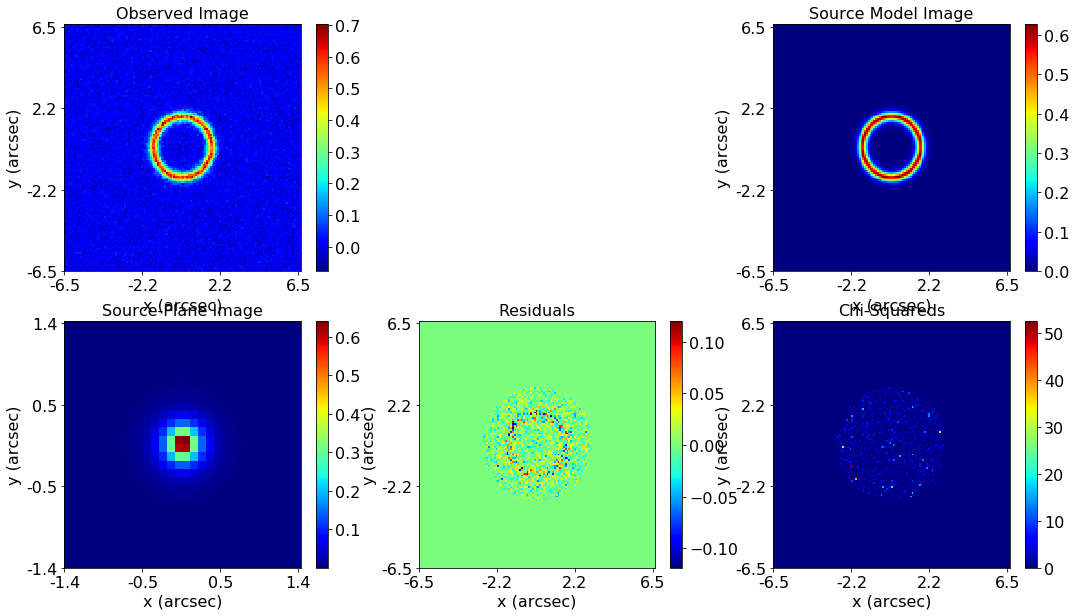

In [11]:
# The best-fit solution (i.e. the highest likelihood) is stored in the 'results', which we can plot as per usual.
fitting_plotters.plot_fitting(fit=results.fit)

In [ ]:
# The fit looks good, and we've therefore found a model pretty close to the one we simulated the image with (you can 
# confirm this yourself if you want, by comparing the inferred parameters to those found in the simulations.py file).

# And with that, we're done - you've successfully modeled your first strong lens with PyAutoLens! Before moving
# onto the next tutorial, I want you to think about the following:

# 1) a non-linear search is often said to search a 'non-linear parameter-space' - why is the term parameter-space used?

# 2) Why is this parameter space 'non-linear'?

# 3) Initially, the non-linear search randomly guesses the values of the parameters. However, it shouldn't 'know' what
#    reasonable values for a parameter are. For example, it doesn't know that a reasonable Einstein radius is between 
#    0.0" and 4.0"). How does it know what are reasonable values of parameters to guess?